<a href="https://colab.research.google.com/github/2403a52009-bot/NLP/blob/main/nlp_asn_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# spaCy Pipeline for Research Abstract Processing (arXiv Dataset)

Course: Natural Language Processing  
Assignment: Text Preprocessing with NLTK and spaCy  

**Objective:**  
Analyze research abstracts using spaCy to extract noun phrases, named entities, and technical term patterns, and visualize results.


In [ ]:

import pandas as pd
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from spacy.matcher import Matcher


In [ ]:

nlp = spacy.load("en_core_web_sm")


## Load arXiv Dataset

In [ ]:

df = pd.read_csv("arxiv_data.csv")
df.head()


,titles,summaries,terms
0,Survey on Semantic Stereo Matching / Semantic ...,Stereo matching is one of the widely used tech...,"['cs.CV', 'cs.LG']"
1,FUTURE-AI: Guiding Principles and Consensus Re...,The recent advancements in artificial intellig...,"['cs.CV', 'cs.AI', 'cs.LG']"
2,Enforcing Mutual Consistency of Hard Regions f...,"In this paper, we proposed a novel mutual cons...","['cs.CV', 'cs.AI']"
3,Parameter Decoupling Strategy for Semi-supervi...,Consistency training has proven to be an advan...,['cs.CV']
4,Background-Foreground Segmentation for Interio...,"To ensure safety in automated driving, the cor...","['cs.CV', 'cs.LG']"



## Select Abstract Text
Assuming the column name containing abstracts is `abstract`.


In [9]:
texts = df['summaries'].dropna().tolist()
texts[:3]

['Stereo matching is one of the widely used techniques for inferring depth from\nstereo images owing to its robustness and speed. It has become one of the major\ntopics of research since it finds its applications in autonomous driving,\nrobotic navigation, 3D reconstruction, and many other fields. Finding pixel\ncorrespondences in non-textured, occluded and reflective areas is the major\nchallenge in stereo matching. Recent developments have shown that semantic cues\nfrom image segmentation can be used to improve the results of stereo matching.\nMany deep neural network architectures have been proposed to leverage the\nadvantages of semantic segmentation in stereo matching. This paper aims to give\na comparison among the state of art networks both in terms of accuracy and in\nterms of speed which are of higher importance in real-time applications.',
 "The recent advancements in artificial intelligence (AI) combined with the\nextensive amount of data generated by today's clinical system

## Process Abstracts using spaCy

In [10]:

docs = list(nlp.pipe(texts[:500]))
len(docs)


500

## Extract Frequent Noun Phrases

In [11]:

noun_phrases = []

for doc in docs:
    for chunk in doc.noun_chunks:
        noun_phrases.append(chunk.text.lower())

from collections import Counter
noun_phrase_freq = Counter(noun_phrases)
noun_phrase_freq.most_common(20)


[('we', 1295),
 ('which', 425),
 ('that', 326),
 ('it', 281),
 ('this paper', 195),
 ('the-art', 191),
 ('image segmentation', 148),
 ('our method', 115),
 ('-', 99),
 ('this work', 98),
 ('training', 75),
 ('segmentation', 75),
 ('semantic segmentation', 70),
 ('this', 63),
 ('images', 62),
 ('medical image segmentation', 58),
 ('they', 56),
 ('the performance', 52),
 ('our approach', 51),
 ('the proposed method', 44)]

## Extract Named Entities

In [12]:

entities = []

for doc in docs:
    for ent in doc.ents:
        if ent.label_ in ['ORG', 'DATE', 'PRODUCT', 'GPE']:
            entities.append((ent.text, ent.label_))

entity_freq = Counter(entities)
entity_freq.most_common(20)


[(('CNN', 'ORG'), 64),
 (('3D', 'ORG'), 53),
 (('U-Net', 'ORG'), 51),
 (('CT', 'ORG'), 32),
 (('UDA', 'ORG'), 21),
 (('NAS', 'ORG'), 19),
 (('SSL', 'ORG'), 18),
 (('recent years', 'DATE'), 16),
 (('IoU', 'ORG'), 16),
 (('Dice', 'ORG'), 16),
 (('EM', 'ORG'), 15),
 (('Transformer', 'ORG'), 14),
 (('RGB', 'ORG'), 12),
 (('CamVid', 'ORG'), 11),
 (('FSS', 'ORG'), 11),
 (('GPU', 'ORG'), 10),
 (('CMPC', 'ORG'), 10),
 (('mIoU', 'ORG'), 9),
 (('Cityscapes', 'GPE'), 9),
 (('FCM', 'ORG'), 9)]

## Rule-Based Matching for Technical Terms

In [13]:

matcher = Matcher(nlp.vocab)

pattern = [
    {"POS": "ADJ", "OP": "*"},
    {"POS": "NOUN", "OP": "+"}
]

matcher.add("TECHNICAL_TERM", [pattern])

matched_terms = []

for doc in docs:
    matches = matcher(doc)
    for match_id, start, end in matches:
        matched_terms.append(doc[start:end].text.lower())

Counter(matched_terms).most_common(20)


[('segmentation', 1605),
 ('image', 1166),
 ('image segmentation', 525),
 ('data', 482),
 ('images', 450),
 ('learning', 424),
 ('method', 419),
 ('model', 380),
 ('network', 360),
 ('performance', 340),
 ('methods', 330),
 ('results', 303),
 ('training', 289),
 ('datasets', 250),
 ('models', 247),
 ('state', 231),
 ('paper', 230),
 ('tasks', 224),
 ('art', 221),
 ('dataset', 217)]

## Visualization: Top Noun Phrases

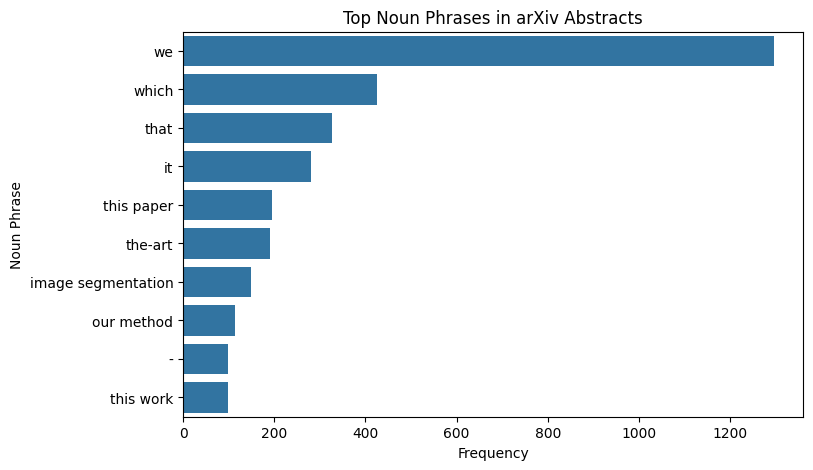

In [14]:

top_np = noun_phrase_freq.most_common(10)
np_df = pd.DataFrame(top_np, columns=['Noun Phrase', 'Frequency'])

plt.figure(figsize=(8,5))
sns.barplot(data=np_df, x='Frequency', y='Noun Phrase')
plt.title("Top Noun Phrases in arXiv Abstracts")
plt.show()


## Visualization: Entity Frequency

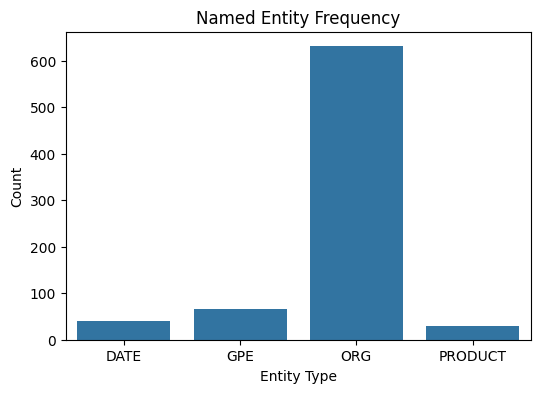

In [17]:

entity_labels = [label for _, label in entity_freq]
entity_label_freq = Counter(entity_labels)

plt.figure(figsize=(6,4))
sns.barplot(x=list(entity_label_freq.keys()), y=list(entity_label_freq.values()))
plt.title("Named Entity Frequency")
plt.xlabel("Entity Type")
plt.ylabel("Count")
plt.show()



## Expected Output Summary

- Frequent noun phrases representing technical concepts  
- Named entities such as organizations and dates  
- Rule-based matched technical terms  
- Visual summaries using bar charts  

This demonstrates the use of spaCy pipeline on real-world research text.
